In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.fft import fft2, ifft2
import torchvision
import torchvision.transforms as T
from torchvision import io
from torch.utils.data import Dataset, DataLoader

import os
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import numpy as np

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
!rm DeconvModels.py
!rm training_functions.py
!wget https://raw.githubusercontent.com/viibrem/ml_masters_uct/master/PyTorch/Models/DeconvModels.py -q
!wget https://raw.githubusercontent.com/viibrem/ml_masters_uct/master/PyTorch/util/training_functions.py -q
from DeconvModels import Deconv2D
from training_functions import train_regression_model, train_classification_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
class GoproSynthetic(Dataset):
    def __init__(self, blur_path, sharp_path):

        y_imgs = os.listdir(sharp_path)
        x_imgs = os.listdir(blur_path)

        y_imgs.sort()
        x_imgs.sort()

        self.y_paths = list(map(lambda img_path: f'{sharp_path}/{img_path}', y_imgs))
        self.x_paths = list(map(lambda img_path: f'{blur_path}/{img_path}', x_imgs))

    
    def __len__(self):
        return len(self.y_paths)


    def __getitem__(self, idx):
        y_path = self.y_paths[idx]
        x_path = self.x_paths[idx]

        # x_img = io.read_image(x_path, io.ImageReadMode.GRAY)
        y_img = io.read_image(y_path, io.ImageReadMode.GRAY)
        x_img = io.read_image(x_path, io.ImageReadMode.GRAY)

        SIZE = 128
        PAD_SIZE = SIZE//2

        centre_crop = T.CenterCrop(SIZE)

        # Preprocess sharp image
        y_img = centre_crop(y_img)
        y_img = y_img / 255.0
        y_img = nn.functional.pad(y_img, (PAD_SIZE, PAD_SIZE, PAD_SIZE, PAD_SIZE))

        # Preprocess blur image
        x_img = centre_crop(x_img)
        x_img = x_img / 255.0
        x_img = nn.functional.pad(x_img, (PAD_SIZE, PAD_SIZE, PAD_SIZE, PAD_SIZE))

        return x_img, y_img

In [ ]:
base_path = '/content/drive/MyDrive/data/gopro-small/'

x_path = base_path + 'blur/'
y_path = base_path + 'sharp'

data = GoproSynthetic(x_path, y_path)

data_len = len(data)
dataloader = DataLoader(data, batch_size=16, shuffle=False)

data_len

100

(-0.5, 255.5, 255.5, -0.5)

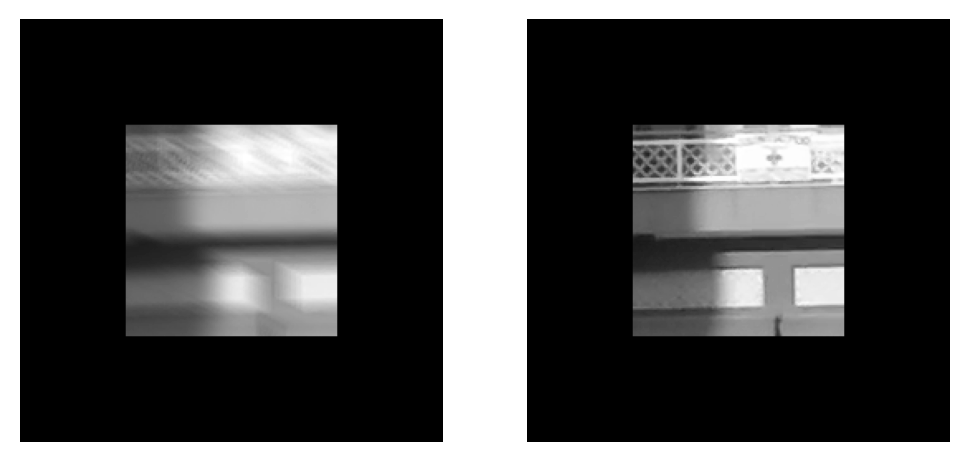

In [ ]:
blur_img, unblur_img = next(iter(dataloader))

plt.subplots(1, 2)

plt.subplot(1, 2, 1)
plt.imshow(blur_img[0, 0, :, :],cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(unblur_img[0, 0, :, :],cmap='gray')
plt.axis('off')

In [ ]:
model = Deconv2D((10, 10))

model = model.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
history = train_regression_model(model, criterion, optimizer, dataloader, num_epochs=100)

100%|██████████| 7/7 [00:12<00:00,  1.75s/it]


Epoch 0001 loss: 0.05235


100%|██████████| 7/7 [00:08<00:00,  1.15s/it]


Epoch 0002 loss: 0.05391


100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


Epoch 0003 loss: 0.02022


100%|██████████| 7/7 [00:06<00:00,  1.01it/s]


Epoch 0004 loss: 0.01433


100%|██████████| 7/7 [00:06<00:00,  1.08it/s]


Epoch 0005 loss: 0.01206


100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


Epoch 0006 loss: 0.01165


100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


Epoch 0007 loss: 0.01158


100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


Epoch 0008 loss: 0.01150


100%|██████████| 7/7 [00:06<00:00,  1.04it/s]


Epoch 0009 loss: 0.01147


100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


Epoch 0010 loss: 0.01139


100%|██████████| 7/7 [00:07<00:00,  1.07s/it]


Epoch 0011 loss: 0.01134


100%|██████████| 7/7 [00:07<00:00,  1.05s/it]


Epoch 0012 loss: 0.01128


100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


Epoch 0013 loss: 0.01125


100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


Epoch 0014 loss: 0.01124


100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


Epoch 0015 loss: 0.01124


100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


Epoch 0016 loss: 0.01124


100%|██████████| 7/7 [00:06<00:00,  1.02it/s]


Epoch 0017 loss: 0.01123


100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


Epoch 0018 loss: 0.01123


100%|██████████| 7/7 [00:07<00:00,  1.01s/it]


Epoch 0019 loss: 0.01123


100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


Epoch 0020 loss: 0.01123


100%|██████████| 7/7 [00:07<00:00,  1.02s/it]


Epoch 0021 loss: 0.01123


100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


Epoch 0022 loss: 0.01123


100%|██████████| 7/7 [00:07<00:00,  1.04s/it]


Epoch 0023 loss: 0.01123


100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


Epoch 0024 loss: 0.01123


100%|██████████| 7/7 [00:07<00:00,  1.03s/it]


Epoch 0025 loss: 0.01123


100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


Epoch 0026 loss: 0.01123


100%|██████████| 7/7 [00:07<00:00,  1.03s/it]


Epoch 0027 loss: 0.01123


100%|██████████| 7/7 [00:06<00:00,  1.17it/s]


Epoch 0028 loss: 0.01123


100%|██████████| 7/7 [00:07<00:00,  1.03s/it]


Epoch 0029 loss: 0.01123


100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


Epoch 0030 loss: 0.01123


100%|██████████| 7/7 [00:07<00:00,  1.04s/it]


Epoch 0031 loss: 0.01123


100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


Epoch 0032 loss: 0.01123


100%|██████████| 7/7 [00:07<00:00,  1.02s/it]


Epoch 0033 loss: 0.01123


100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


Epoch 0034 loss: 0.01123


100%|██████████| 7/7 [00:07<00:00,  1.03s/it]


Epoch 0035 loss: 0.01123


100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


Epoch 0036 loss: 0.01123


100%|██████████| 7/7 [00:07<00:00,  1.01s/it]


Epoch 0037 loss: 0.01123


100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


Epoch 0038 loss: 0.01123


100%|██████████| 7/7 [00:07<00:00,  1.02s/it]


Epoch 0039 loss: 0.01123


100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


Epoch 0040 loss: 0.01123


100%|██████████| 7/7 [00:07<00:00,  1.02s/it]


Epoch 0041 loss: 0.01123


100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


Epoch 0042 loss: 0.01123


100%|██████████| 7/7 [00:07<00:00,  1.02s/it]


Epoch 0043 loss: 0.01123


100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


Epoch 0044 loss: 0.01123


100%|██████████| 7/7 [00:07<00:00,  1.02s/it]


Epoch 0045 loss: 0.01123


100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


Epoch 0046 loss: 0.01123


100%|██████████| 7/7 [00:07<00:00,  1.00s/it]


Epoch 0047 loss: 0.01123


100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


Epoch 0048 loss: 0.01123


100%|██████████| 7/7 [00:06<00:00,  1.02it/s]


Epoch 0049 loss: 0.01123


100%|██████████| 7/7 [00:06<00:00,  1.08it/s]


Epoch 0050 loss: 0.01123


100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


Epoch 0051 loss: 0.01123


100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


Epoch 0052 loss: 0.01123


100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


Epoch 0053 loss: 0.01123


100%|██████████| 7/7 [00:06<00:00,  1.03it/s]


Epoch 0054 loss: 0.01123


100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


Epoch 0055 loss: 0.01123


100%|██████████| 7/7 [00:06<00:00,  1.00it/s]


Epoch 0056 loss: 0.01124


100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


Epoch 0057 loss: 0.01124


100%|██████████| 7/7 [00:07<00:00,  1.05s/it]


Epoch 0058 loss: 0.01125


100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


Epoch 0059 loss: 0.01126


100%|██████████| 7/7 [00:07<00:00,  1.04s/it]


Epoch 0060 loss: 0.01128


100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


Epoch 0061 loss: 0.01131


100%|██████████| 7/7 [00:07<00:00,  1.02s/it]


Epoch 0062 loss: 0.01135


100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


Epoch 0063 loss: 0.01141


100%|██████████| 7/7 [00:07<00:00,  1.02s/it]


Epoch 0064 loss: 0.01151


100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


Epoch 0065 loss: 0.01164


100%|██████████| 7/7 [00:07<00:00,  1.02s/it]


Epoch 0066 loss: 0.01184


100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


Epoch 0067 loss: 0.01212


100%|██████████| 7/7 [00:07<00:00,  1.03s/it]


Epoch 0068 loss: 0.01250


100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


Epoch 0069 loss: 0.01300


100%|██████████| 7/7 [00:07<00:00,  1.02s/it]


Epoch 0070 loss: 0.01363


100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


Epoch 0071 loss: 0.01437


100%|██████████| 7/7 [00:07<00:00,  1.04s/it]


Epoch 0072 loss: 0.01517


100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


Epoch 0073 loss: 0.01588


100%|██████████| 7/7 [00:07<00:00,  1.02s/it]


Epoch 0074 loss: 0.01629


100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


Epoch 0075 loss: 0.01614


100%|██████████| 7/7 [00:07<00:00,  1.03s/it]


Epoch 0076 loss: 0.01537


100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


Epoch 0077 loss: 0.01420


100%|██████████| 7/7 [00:07<00:00,  1.02s/it]


Epoch 0078 loss: 0.01307


100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


Epoch 0079 loss: 0.01223


100%|██████████| 7/7 [00:07<00:00,  1.02s/it]


Epoch 0080 loss: 0.01174


100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


Epoch 0081 loss: 0.01148


100%|██████████| 7/7 [00:07<00:00,  1.03s/it]


Epoch 0082 loss: 0.01136


100%|██████████| 7/7 [00:06<00:00,  1.14it/s]


Epoch 0083 loss: 0.01131


100%|██████████| 7/7 [00:07<00:00,  1.02s/it]


Epoch 0084 loss: 0.01129


100%|██████████| 7/7 [00:06<00:00,  1.12it/s]


Epoch 0085 loss: 0.01128


100%|██████████| 7/7 [00:06<00:00,  1.01it/s]


Epoch 0086 loss: 0.01128


100%|██████████| 7/7 [00:06<00:00,  1.11it/s]


Epoch 0087 loss: 0.01128


100%|██████████| 7/7 [00:06<00:00,  1.04it/s]


Epoch 0088 loss: 0.01129


100%|██████████| 7/7 [00:06<00:00,  1.09it/s]


Epoch 0089 loss: 0.01131


100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


Epoch 0090 loss: 0.01133


100%|██████████| 7/7 [00:06<00:00,  1.06it/s]


Epoch 0091 loss: 0.01137


100%|██████████| 7/7 [00:06<00:00,  1.07it/s]


Epoch 0092 loss: 0.01141


100%|██████████| 7/7 [00:06<00:00,  1.03it/s]


Epoch 0093 loss: 0.01148


100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


Epoch 0094 loss: 0.01157


100%|██████████| 7/7 [00:06<00:00,  1.01it/s]


Epoch 0095 loss: 0.01169


100%|██████████| 7/7 [00:06<00:00,  1.13it/s]


Epoch 0096 loss: 0.01186


100%|██████████| 7/7 [00:07<00:00,  1.02s/it]


Epoch 0097 loss: 0.01208


100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


Epoch 0098 loss: 0.01236


100%|██████████| 7/7 [00:07<00:00,  1.02s/it]


Epoch 0099 loss: 0.01272


100%|██████████| 7/7 [00:06<00:00,  1.15it/s]

Epoch 0100 loss: 0.01316


In [ ]:
model.eval()
X, y = next(iter(dataloader))

X = X.to(device)
y = y.to(device)

y_pred = model(X)

In [ ]:
X = X.to("cpu")
y = y.to("cpu")
y_pred = y_pred.to("cpu")

Text(0.5, 1.0, 'Original')

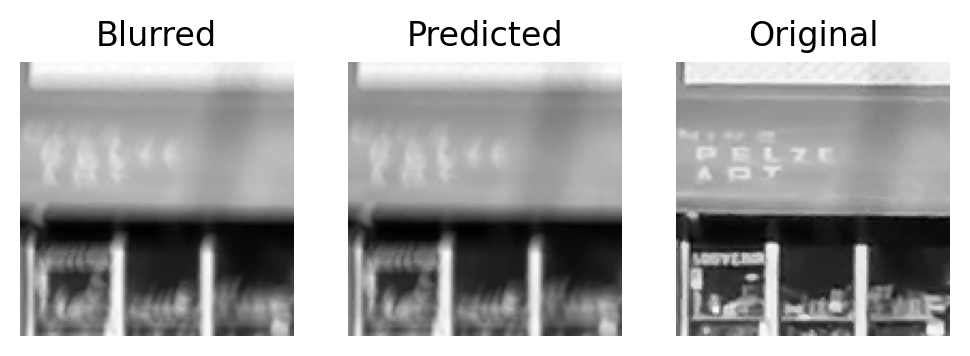

In [ ]:
import random

plt.rcParams['figure.dpi'] = 200
# plt.figure(figsize=(40, 120))

i = random.randint(0, len(X)-1)

plt.subplots(1, 3)

start = X.size(-1)//4
end = 3*start

plt.subplot(1, 3, 1)
plt.imshow(X[i,0,start:end,start:end], cmap='gray')
plt.axis('off')
plt.title('Blurred')

plt.subplot(1, 3, 2)
plt.imshow(y_pred[i,0,start:end,start:end].detach().numpy(), cmap='gray')
plt.axis('off')
plt.title('Predicted')

plt.subplot(1, 3, 3)
plt.imshow(y[i,0,start:end,start:end], cmap='gray')
plt.axis('off')
plt.title('Original')

In [ ]:
model.w_flat

Parameter containing:
tensor([-1.4099e-03, -1.3029e-03, -8.7408e-04, -3.7684e-04, -9.4185e-05,
         5.4672e-05,  3.8450e-04,  9.4313e-04,  1.8052e-03, -1.4318e-03,
        -1.3463e-03, -1.2593e-03, -8.5146e-04, -3.7040e-04, -1.0581e-04,
         1.2473e-05,  3.0055e-04,  8.1021e-04,  1.6315e-03, -1.1647e-03,
        -1.1135e-03, -1.0776e-03, -6.9367e-04, -2.4333e-04, -1.7413e-05,
         4.6818e-05,  2.3980e-04,  6.4066e-04,  1.3647e-03, -6.3785e-04,
        -6.0609e-04, -6.1501e-04, -3.1845e-04,  4.8224e-05,  2.1209e-04,
         1.8343e-04,  2.3709e-04,  4.8529e-04,  1.0664e-03, -1.2078e-04,
        -1.0933e-04, -1.7228e-04,  2.3916e-05,  2.8238e-04,  3.5949e-04,
         2.3745e-04,  1.5359e-04,  2.4009e-04,  6.5419e-04,  9.5291e-05,
         9.3125e-05,  3.2277e-06,  1.3132e-04,  3.1707e-04,  3.3174e-04,
         1.3539e-04, -4.4644e-05, -8.8208e-05,  1.8056e-04,  1.7644e-04,
         1.6186e-04,  5.0293e-05,  1.2477e-04,  2.5945e-04,  2.3172e-04,
        -1.0548e-05, -2.6795e